In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py as h5
import math

from read_hdf5_reader import *

In [4]:
# Define your figsize function
def figsize(scale):
    fig_width_pt = 441.0173  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0  # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean  # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

In [ ]:
# Define LaTeX parameters
pgf_with_latex = {
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,
    "font.family": "sans-serif",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 11,
    "font.size": 11,
    "legend.fontsize": 9,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": figsize(0.9),
    "pgf.preamble":
       r"\usepackage[utf8]{inputenc}"    # use utf8 fonts becasue your computer can handle it :)
}

# Update Matplotlib parameters with LaTeX settings
import matplotlib as mpl
mpl.rcParams.update(pgf_with_latex)

## Width sweep
### Si Waveguide

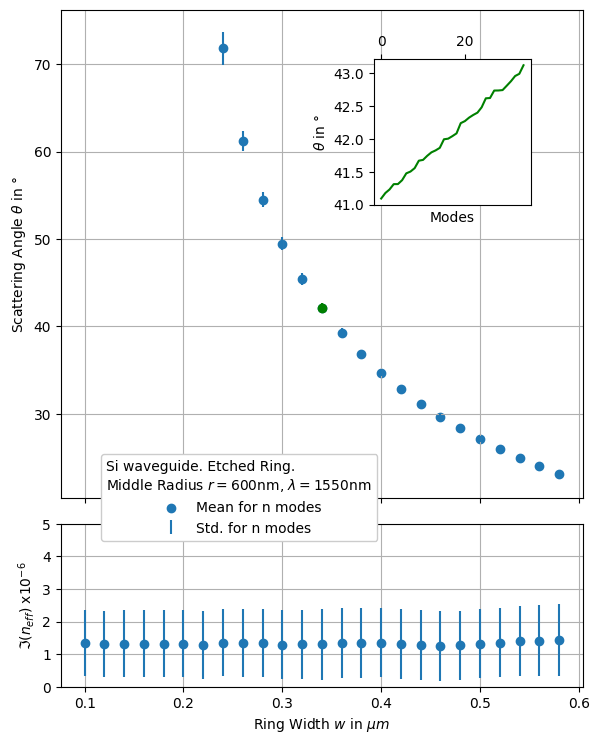

In [11]:
from scatter_ring_data import *
kwargs={
    'path': "C:\\Users\\Luis Mickeler\\Documents\\Masterarbeit\\Lumerical\\FDE\\block with ring\\results",
    'filename': "results_width_sweep_Si-WG_600nm-middle_radius.mat",
    'wavelength': 1.55e-6,
}
data = data_prosessor_width_sweep(**kwargs)
ring_widths = data['ring_widths']
thetas = data['thetas']
n_imag_mean = data['n_imag_mean']
n_imag_std = data['n_imag_std']
num_elements = data['num_elements']
# ------------------------------------------------------
# PLOT
# ------------------------------------------------------
# Data for the two subplots (replace with your data)
x = ring_widths*1e6
y1 = np.array([arr.mean() for arr in thetas])
y1_std = np.array([arr.std() for arr in thetas])
y2 = n_imag_mean
y2_std = n_imag_std

# Calculate y1-axis limits with a buffer of +/- 0.08 degrees
y1_min = np.min(y1) - 0.08
y1_max = np.max(y1) + 0.2

# Create a figure and two subplots with larger figsize
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(figsize(scale=1)[0], figsize(scale=1)[1]*2), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

# Create the subplot within the upper plot
inner_subplot_x = 0.6
inner_subplot_y = 0.6
ax1_sub = ax1.inset_axes([inner_subplot_x, inner_subplot_y, 0.3, 0.3])  # [x, y, width, height]

# Add data of middle sweep element as an example plot over first ... modes
middle_element = int(num_elements/2)
sub_x = range(len(thetas[middle_element]))
sub_y = thetas[middle_element]
ax1_sub.plot(sub_x, sub_y, label='Custom Data', color='green')
ax1_sub.set_xlabel('Modes')
ax1_sub.set_ylabel(r'$\theta$ in °')
ax1_sub.xaxis.tick_top()
ax1_sub.xaxis.set_tick_params(labeltop=True)

# Specify the data point for the pointer
pointer_x = x[len(x) // 2]  # Middle data point x-coordinate
pointer_y = y1[len(y1) // 2]  # Middle data point y-coordinate

# Plot data on the first subplot (ax1) as a scatter plot with error bars
scatter = ax1.scatter(x, y1)
errorbars = ax1.errorbar(x, y1, yerr=y1_std, fmt='o', markersize=0)
ax1.set_ylabel(r'Scattering Angle $\theta$ in °')
#ax1.set_ylim(y1_min, y1_max)  # Set y1-axis limits
ax1.grid()
# Plot single data point with same color as subplot
ax1.errorbar(x[middle_element], y1[middle_element], yerr=y1_std[middle_element], fmt='o', label=f'$\sigma$ of first n modes', color='green')

# Combine the scatter plot and error bars for a single legend entry
handles = [scatter, errorbars]
labels = [f'Mean for n modes', f'Std. for n modes']

# Plot data on the second subplot (ax2) with y-axis in scientific notation
ax2.errorbar(x, y2*1e+6, yerr = y2_std*1e+6, marker = 'o', label=f'Mean of first n modes', ls='none')
ax2.set_xlabel(r'Ring Width $w$ in $\mu m$')
ax2.set_ylabel(r'$\Im{(n_{eff})}$ x$10^{-6}$')
ax2.grid()
ax2.set_yticks(np.arange(0, 6))

# Create a legend above both subplots
title = 'Si waveguide. Etched Ring. \n' + r'Middle Radius $r =  600$nm, $\lambda = 1550$nm'
fig.legend(handles, labels, title=title, loc='upper center', bbox_to_anchor=(0.4, 0.4), ncol=1, framealpha=1, facecolor='inherit')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Si3N4 Waveguide

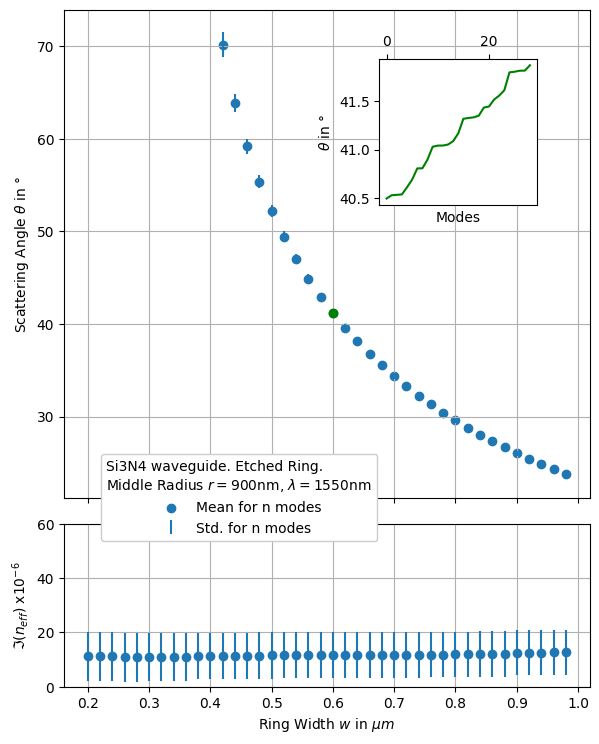

In [9]:
from scatter_ring_data import *
kwargs={
    'path': "C:\\Users\\Luis Mickeler\\Documents\\Masterarbeit\\Lumerical\\FDE\\block with ring\\results",
    'filename': "results_width_sweep_Si3N4-WG_900nm-middle_radius.mat",
    'wavelength': 1.55e-6,
}
data = data_prosessor_width_sweep(**kwargs)
ring_widths = data['ring_widths']
thetas = data['thetas']
n_imag_mean = data['n_imag_mean']
n_imag_std = data['n_imag_std']
num_elements = data['num_elements']
# ------------------------------------------------------
# PLOT
# ------------------------------------------------------
# Data for the two subplots (replace with your data)
x = ring_widths*1e6
y1 = np.array([arr.mean() for arr in thetas])
y1_std = np.array([arr.std() for arr in thetas])
y2 = n_imag_mean
y2_std = n_imag_std

# Calculate y1-axis limits with a buffer of +/- 0.08 degrees
y1_min = np.min(y1) - 0.08
y1_max = np.max(y1) + 0.2

# Create a figure and two subplots with larger figsize
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(figsize(scale=1)[0], figsize(scale=1)[1]*2), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

# Create the subplot within the upper plot
inner_subplot_x = 0.6
inner_subplot_y = 0.6
ax1_sub = ax1.inset_axes([inner_subplot_x, inner_subplot_y, 0.3, 0.3])  # [x, y, width, height]

# Add data of middle sweep element as an example plot over first ... modes
middle_element = int(num_elements/2)
sub_x = range(len(thetas[middle_element]))
sub_y = thetas[middle_element]
ax1_sub.plot(sub_x, sub_y, label='Custom Data', color='green')
ax1_sub.set_xlabel('Modes')
ax1_sub.set_ylabel(r'$\theta$ in °')
ax1_sub.xaxis.tick_top()
ax1_sub.xaxis.set_tick_params(labeltop=True)

# Specify the data point for the pointer
pointer_x = x[len(x) // 2]  # Middle data point x-coordinate
pointer_y = y1[len(y1) // 2]  # Middle data point y-coordinate

# Plot data on the first subplot (ax1) as a scatter plot with error bars
scatter = ax1.scatter(x, y1)
errorbars = ax1.errorbar(x, y1, yerr=y1_std, fmt='o', markersize=0)
ax1.set_ylabel(r'Scattering Angle $\theta$ in °')
#ax1.set_ylim(y1_min, y1_max)  # Set y1-axis limits
ax1.grid()
# Plot single data point with same color as subplot
ax1.errorbar(x[middle_element], y1[middle_element], yerr=y1_std[middle_element], fmt='o', label=f'$\sigma$ of first n modes', color='green')

# Combine the scatter plot and error bars for a single legend entry
handles = [scatter, errorbars]
labels = [f'Mean for n modes', f'Std. for n modes']

# Plot data on the second subplot (ax2) with y-axis in scientific notation
ax2.errorbar(x, y2*1e+6, yerr = y2_std*1e+6, marker = 'o', label=f'Mean of first n modes', ls='none')
ax2.set_xlabel(r'Ring Width $w$ in $\mu m$')
ax2.set_ylabel(r'$\Im{(n_{eff})}$ x$10^{-6}$')
ax2.grid()
ax2.set_ylim(0, 60)

# Create a legend above both subplots
title = 'Si3N4 waveguide. Etched Ring. \n' + r'Middle Radius $r =  900$nm, $\lambda = 1550$nm'
fig.legend(handles, labels, title=title, loc='upper center', bbox_to_anchor=(0.4, 0.4), ncol=1, framealpha=1, facecolor='inherit')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
